In [58]:
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')


path = '/content/drive/My Drive/Social_Network_Ads (1).csv'

df=pd.read_csv(path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [59]:
#df.isna().sum()
X=df.iloc[:,2:4].values
y=df.iloc[:,-1].values


In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
#

In [62]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
classifier.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [63]:
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9125


In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[47  5]
 [ 2 26]]


<Axes: >

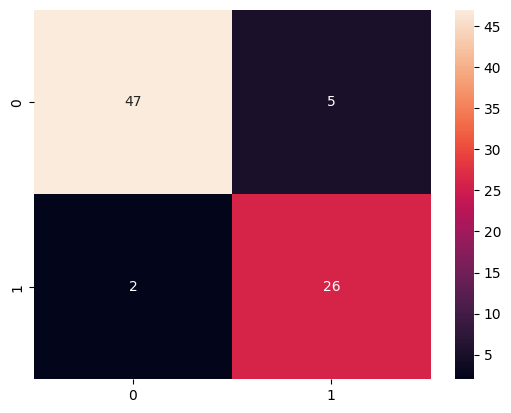

In [65]:
import seaborn as sns
sns.heatmap(cm,annot=True)

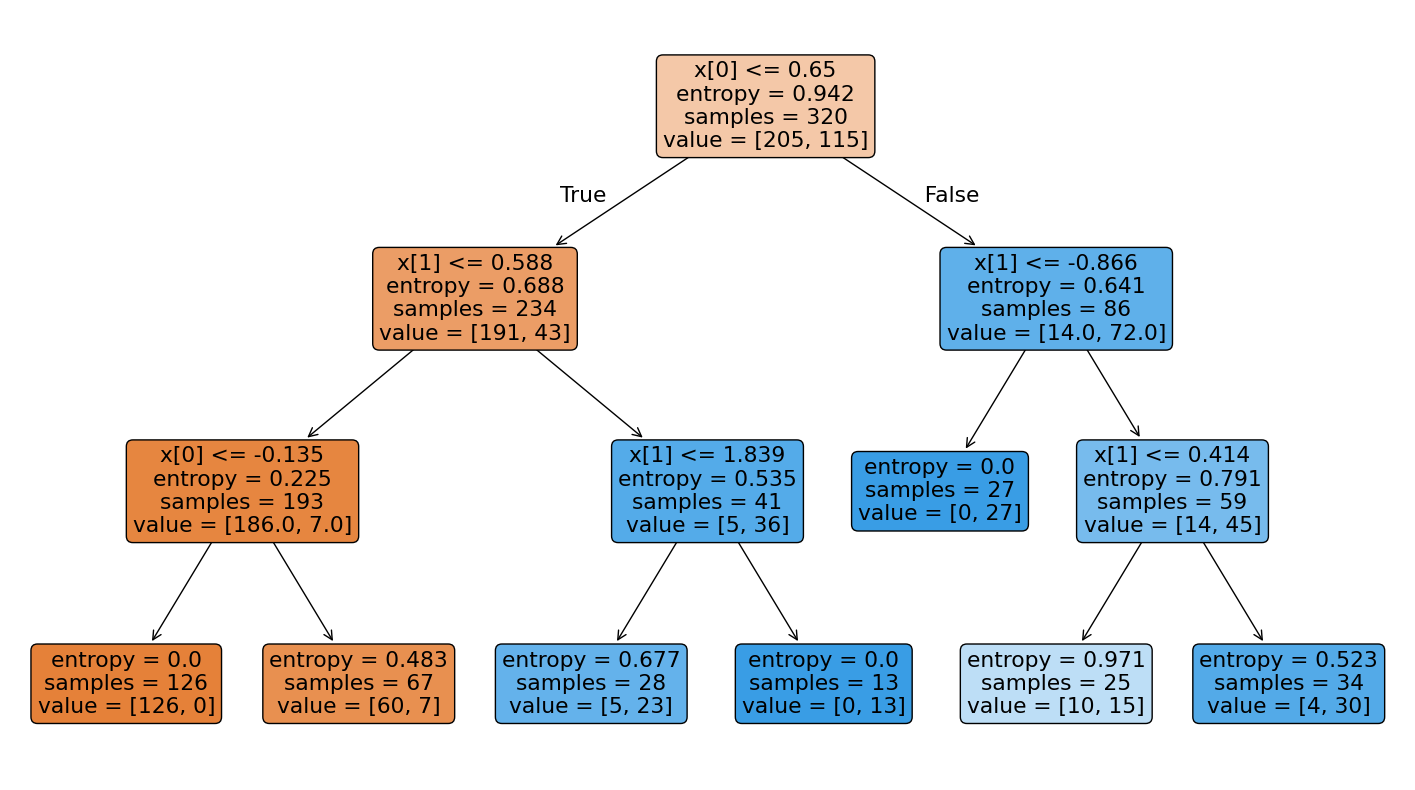

In [66]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plot_tree(
    classifier,
    filled=True,
    rounded=True,
)
plt.show()